In [143]:
# import important libraries
import pandas as pd
import face_recognition
from PIL import Image
from DeepImageSearch import Load_Data,Search_Setup


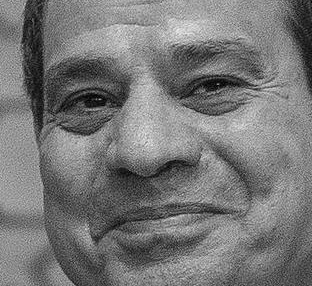

In [144]:
#import user ids
search = pd.read_csv("search.csv")

#ask which user to crop there face
usrid = input("Please Enter user id")
loc = search["FilePath"][int(usrid)]


#Getting Face location
image = face_recognition.load_image_file(loc)
fl = face_recognition.face_locations(image)

# Assign location pixels
[top, right, bottom, left] = fl[0]

# Opens image
im = Image.open(loc).convert('L')
im1 = im.crop((left, top, right, bottom))

# Shows the image in image viewer
im1

In [145]:
class img:
    
    def preproD(usrid):
        face = pd.read_csv("faces.csv")
        loc = face["FilePath"][int(usrid)]


        #Getting Face location
        image = face_recognition.load_image_file(loc)
        fl = face_recognition.face_locations(image)

        # Assign location pixels
        [top, right, bottom, left] = fl[0]

        # Opens image
        im = Image.open(loc).convert('L')
        im1 = im.crop((left, top, right, bottom))

        # Shows the image in image viewer
        newloc= "cropped faces/"+str(usrid)+".jpg"
        im1.save(newloc)

    def preproS(usrid):
        search = pd.read_csv("search.csv")
        loc = search["FilePath"][int(usrid)]


        #Getting Face location
        image = face_recognition.load_image_file(loc)
        fl = face_recognition.face_locations(image)

        # Assign location pixels
        [top, right, bottom, left] = fl[0]

        # Opens image
        im = Image.open(loc).convert('L')
        im1 = im.crop((left, top, right, bottom))

        # Shows the image in image viewer
        im1.save(loc)
    

In [146]:
face = pd.read_csv("faces.csv")
for i in range(len(face["user_id"])-1):
    img.preproD(i+1)

In [147]:
image_list = Load_Data().from_folder(['cropped faces'])

In [148]:
print("Total Image Count:",len(image_list))
print("Samples:")
print(image_list[:10])

Total Image Count: 4
Samples:
['cropped faces\\1.jpg', 'cropped faces\\2.jpg', 'cropped faces\\3.jpg', 'cropped faces\\4.jpg']


In [149]:
# Set up the search engine
st = Search_Setup(image_list=image_list,model_name='vgg19',pretrained=True)

 Please Wait Model Is Loading or Downloading From Server!
 Model Loaded Successfully: vgg19


In [150]:
# Index the images
st.run_index()

 Metadata and Features are already present, Do you want Extract Again? Enter yes or no


100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

 Image Meta Information Saved: [metadata-files/vgg19/image_data_features.pkl]
 Saved The Indexed File:[metadata-files/vgg19/image_features_vectors.idx]


In [151]:
# Get metadata
metadata = st.get_image_metadata_file()
metadata

,images_paths,features
0,cropped faces\1.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.058121063, 0.0, 0...."
1,cropped faces\2.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.04343823, 0.0, 0.0..."
2,cropped faces\3.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.021254664, 0.0, 0...."
3,cropped faces\4.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.010376794, 0.0, 0...."


In [152]:
# Add new images to the index
st.add_images_to_index(image_list[1001:1010])

0it [00:00, ?it/s]

 New images added to the index: 0


In [153]:
# Update metadata
metadata = st.get_image_metadata_file()
metadata

,images_paths,features
0,cropped faces\1.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.058121063, 0.0, 0...."
1,cropped faces\2.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.04343823, 0.0, 0.0..."
2,cropped faces\3.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.021254664, 0.0, 0...."
3,cropped faces\4.jpg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.010376794, 0.0, 0...."


In [154]:
# Get similar images
st.get_similar_images(image_path=image_list[0],number_of_images=1)

{0: 'cropped faces\\1.jpg'}

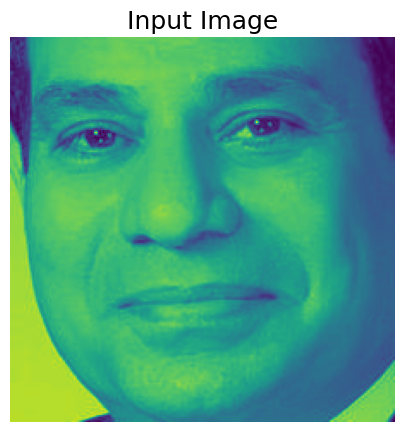

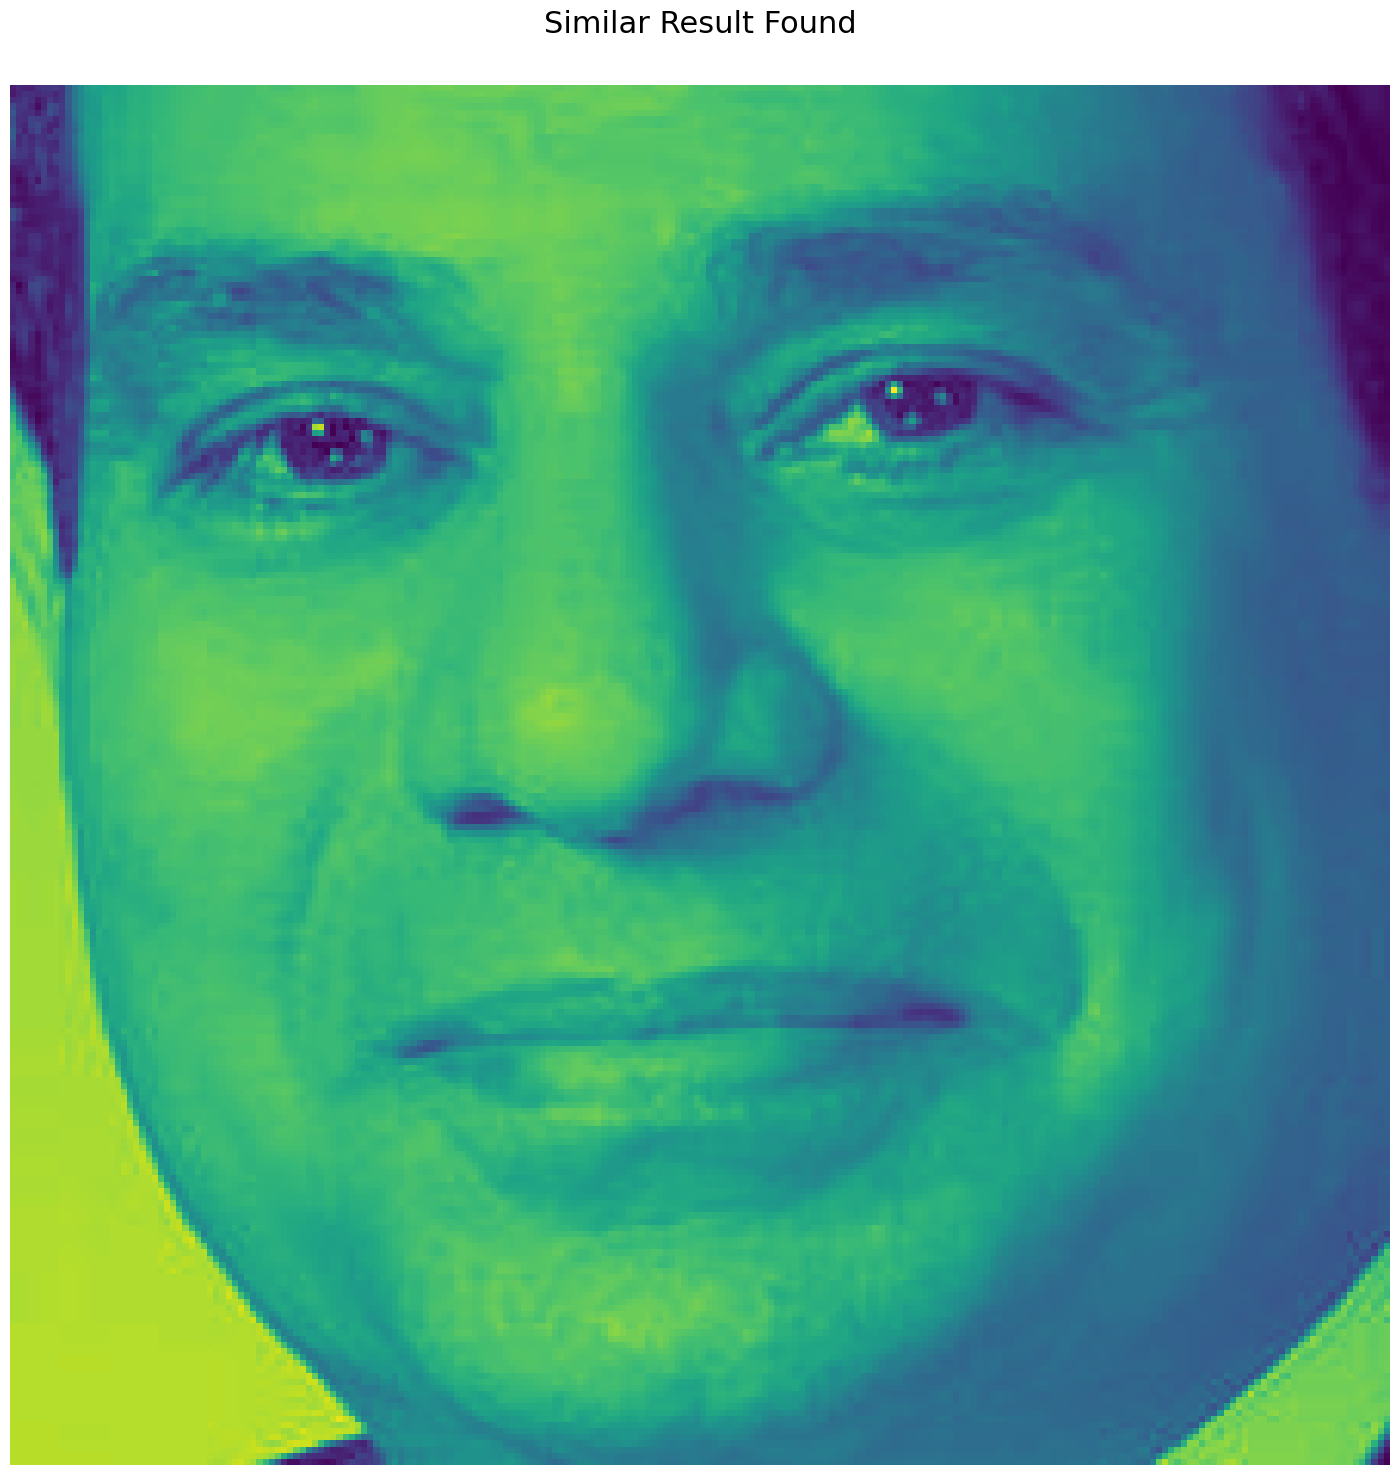

In [155]:
# Plot similar images
st.plot_similar_images(image_path = image_list[0],number_of_images=1)

In [156]:
search = pd.read_csv("Search.csv")

In [157]:
search["FilePath"][2]

'SearchImages/130170.jpg'

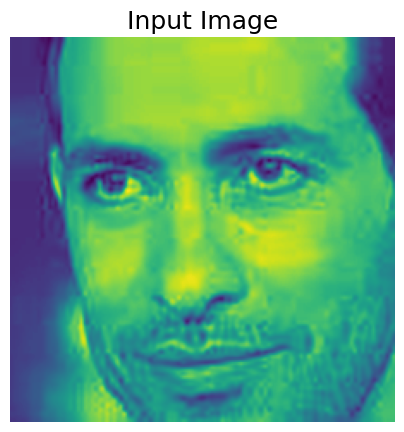

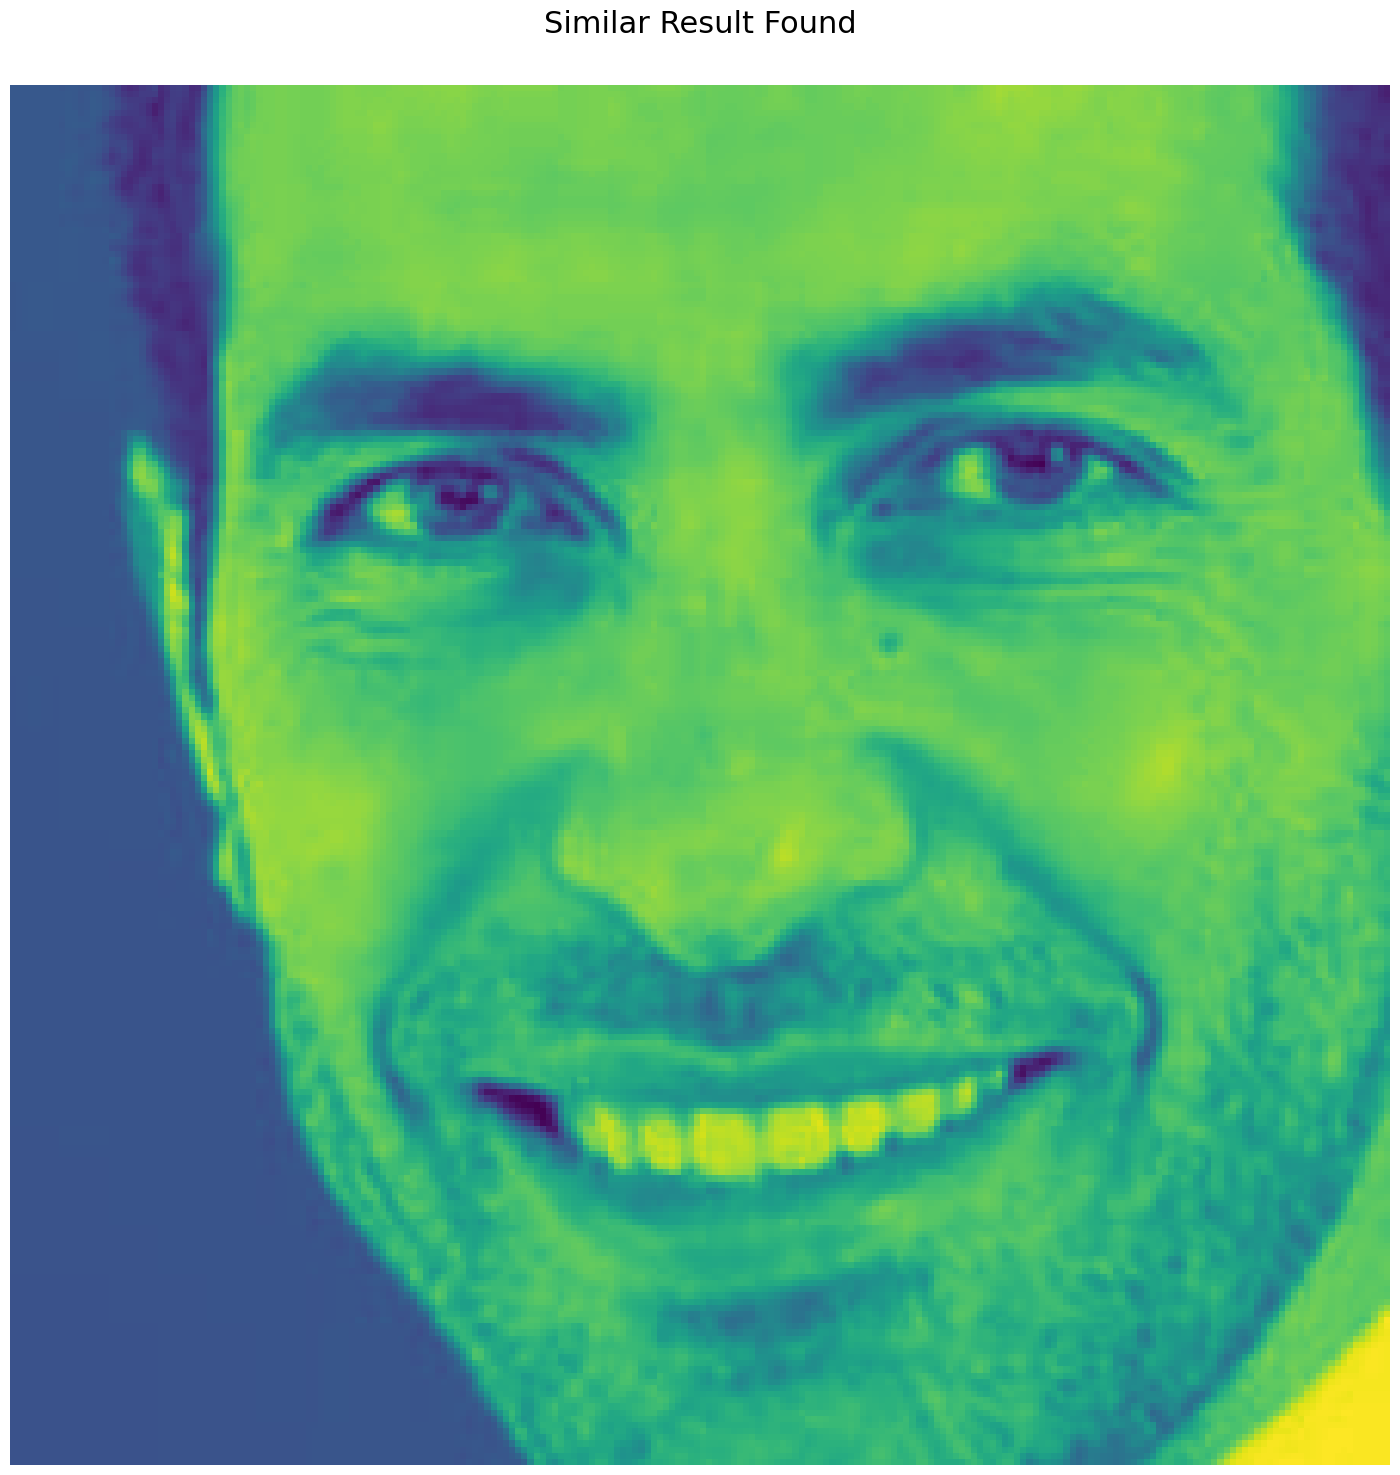

In [161]:
st.plot_similar_images(search["FilePath"][2],number_of_images=1)

In [159]:
similar_images = st.get_similar_images(search["FilePath"][3],number_of_images=1)
if len(list(similar_images)) == 1:
    print("Valid")
else:
    print("Not Valid")

Valid
